# CHAOS BASED ENCRYPTION



## Logistic map

In [1]:
def logistic_key(x, r, size):
    """
    This function accepts the initial x value, 
    r value and the number of keys required for
    encryption.
    The function returns a list of pseudo-random
    numbers generated from the logistic equation. 
    """

    key = []

    for i in range(size):   
        x = r*x*(1-x)   # The logistic equation
        key.append(int((x*pow(10, 16))%256))    # Converting the generated number between 0 to 255

    return key


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img


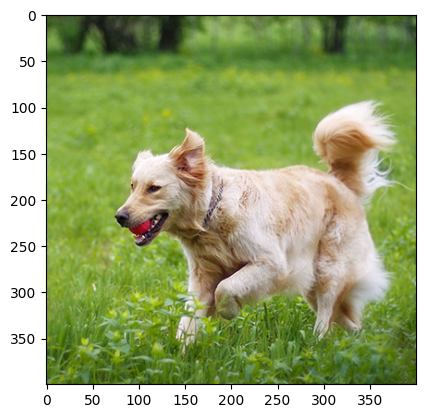

In [3]:
# Accepting an image
path = "D:\LTMM\LTMM\ChaosBasedCrypto\Chaos_Encryption\images\dog.jpg"
image = img.imread(path)

# Displaying the image
plt.imshow(image)
plt.show()


In [4]:
# Generating dimensions of the image
height = image.shape[0]
width = image.shape[1]
print(height, width)

400 400


In [5]:
# Generating keys
# Calling logistic_key and providing r value such that the keys are pseudo-random
# and generating a key for every pixel of the image
generatedKey = logistic_key(0.01, 3.95, height*width) 
print(generatedKey)

[0, 180, 237, 194, 194, 223, 121, 142, 107, 249, 80, 68, 168, 40, 55, 118, 138, 146, 151, 223, 161, 232, 115, 129, 206, 39, 175, 18, 110, 75, 162, 207, 39, 79, 109, 14, 202, 54, 87, 134, 154, 106, 6, 99, 87, 24, 162, 220, 107, 46, 51, 161, 57, 188, 224, 168, 158, 85, 193, 53, 70, 237, 57, 198, 218, 81, 117, 208, 21, 192, 12, 52, 244, 115, 8, 67, 214, 180, 53, 35, 194, 110, 253, 16, 154, 94, 168, 222, 92, 18, 211, 153, 0, 148, 116, 238, 11, 96, 65, 208, 122, 141, 230, 166, 51, 48, 204, 105, 135, 150, 110, 120, 210, 80, 171, 14, 66, 181, 38, 40, 202, 233, 30, 117, 102, 245, 100, 22, 221, 112, 184, 198, 14, 45, 11, 121, 160, 73, 7, 142, 146, 218, 70, 4, 96, 172, 181, 146, 141, 17, 134, 27, 109, 38, 126, 171, 114, 147, 254, 167, 70, 84, 21, 214, 94, 233, 151, 51, 20, 166, 31, 253, 200, 3, 252, 121, 137, 210, 120, 22, 1, 136, 56, 231, 50, 106, 214, 112, 20, 172, 218, 110, 86, 218, 31, 73, 22, 87, 154, 246, 242, 59, 184, 69, 107, 54, 52, 255, 86, 124, 196, 110, 226, 117, 76, 44, 51, 131, 99,

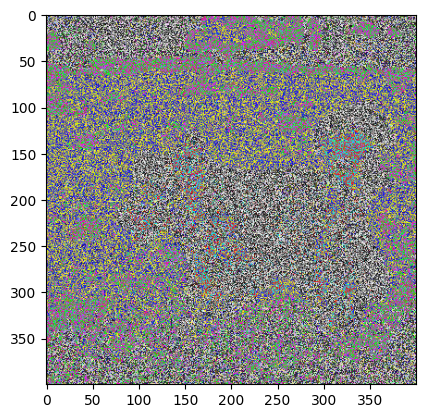

In [6]:
# Encryption using XOR
z = 0

# Initializing the encrypted image
encryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)

# Substituting all the pixels in original image with nested for
for i in range(height):
    for j in range(width):
        # USing the XOR operation between image pixels and keys
        encryptedImage[i, j] = image[i, j].astype(int) ^ generatedKey[z]
        z += 1

# Displaying the encrypted image
plt.imshow(encryptedImage)
plt.show()

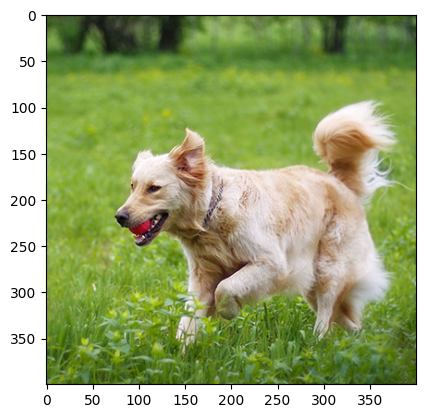

In [7]:
# Decryption using XOR
z = 0

# Initializing the decrypted image
decryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)

# Substituting all the pixels in encrypted image with nested for
for i in range(height):
    for j in range(width):
        # USing the XOR operation between encrypted image pixels and keys
        decryptedImage[i, j] = encryptedImage[i, j].astype(int) ^ generatedKey[z]
        z += 1

# Displaying the decrypted image
plt.imshow(decryptedImage)
plt.show()


## Lorenz encryption


In [19]:
#lorenzSystem
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

def lorenz_key(xinit, yinit, zinit, num_steps):
    """
    This function returns 3 lists of pseudo-random
    numbers generated using Lorenz system of differential
    equations.

    Parameters:
        xinit: float
            initial value of x
        yinit: float
            initial value of y
        zinit: float
            initial value of z
        num_steps: int
            number of keys required
            in a single list
    
    Returns:
        3 lists with pseudo-random numbers
        as their elements
    """

    # Initializing dt to a small value
    dt = 0.01

    # Initializing 3 empty lists
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Initializing initial values
    xs[0], ys[0], zs[0] = (xinit, yinit, zinit)

    # Initializing constants
    s = 10
    r = 28
    b = 2.667

    # System of equations
    for i in range(num_steps):
        xs[i + 1] = xs[i] + (s * (ys[i] - xs[i]) * dt)
        ys[i + 1] = ys[i] + ((xs[i] * (r - zs[i]) - ys[i]) * dt)
        zs[i + 1] = zs[i] + ((xs[i] * ys[i] - b * zs[i]) * dt)

    # Uncomment to plot Lorenz system

    # fig = plt.figure()
    # ax = fig.gca(projection='3d')

    # ax.plot(xs, ys, zs)
    # plt.show()

    return xs, ys, zs

# Uncomment to plot Lorenz system

# lorenz_key(0.01, 0.02, 0.03, 1000)


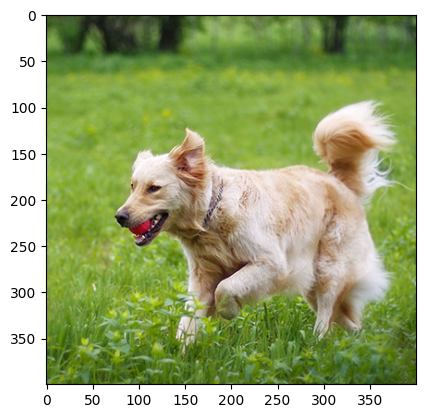

In [20]:
"""
Encrypting an image first by shuffling
it's pixels and then substituting the 
shuffled pixels using pseudo-random
numbersngenerated from Lorenz system
of differential equations
"""

# Importing all the required libraries
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np


# Accepting Image using it's path
path = "D:\LTMM\LTMM\ChaosBasedCrypto\Chaos_Encryption\images\dog.jpg"
image = img.imread(path)

# Displaying original image
plt.imshow(image)
plt.show()



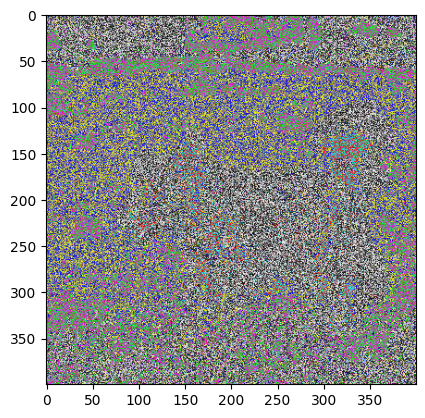

In [30]:
# Storing the size of image in variables
height = image.shape[0]
width = image.shape[1]

# Using lorenz_key function to generate a key for every pixel
x, y, keys = lorenz_key(0.01, 0.02, 0.03, height*width)

l = 0

# Initializing an empty image to store the encrypted image
encryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)

# XORing each pixel with a pseudo-random number generated above/ Performing the 
# substitution algorithm
for i in range(height):
    for j in range(width):
        # Converting the pseudo-random nuber generated into a number between 0 and 255
        zk = (int((keys[l]*pow(10, 5))%256))
        # Performing the XOR operation
        encryptedImage[i, j] = image[i, j]^zk
        l += 1

# Displaying the encrypted image
plt.imshow(encryptedImage)
plt.show()


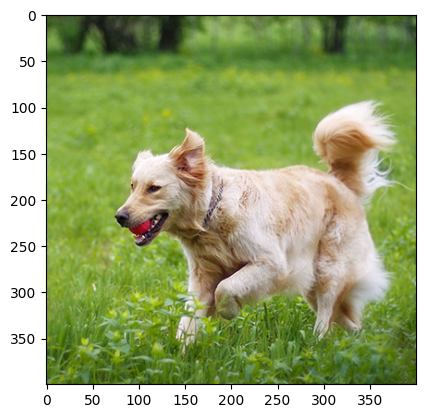

In [31]:
# Initializing an empty image to store the decrypted image
decryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)

# XORing each pixel with the same number it was XORed above above/
# Performing the reverse substitution algorithm
l = 0
for i in range(height):
    for j in range(width):
        zk = (int((keys[l]*pow(10, 5))%256))
        decryptedImage[i, j] = encryptedImage[i, j]^zk
        l += 1

# Displaying the decrypted image
plt.imshow(decryptedImage)
plt.show()